In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [39]:
pd.set_option('display.max_row',7613)
pd.set_option('display.max_column',5)

In [40]:
data = pd.read_csv('train.csv')

In [41]:
data.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


**form analysis**

In [42]:
df = data.copy()

In [43]:
df.shape

(891, 12)

In [44]:
df.dtypes.value_counts()


int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: >

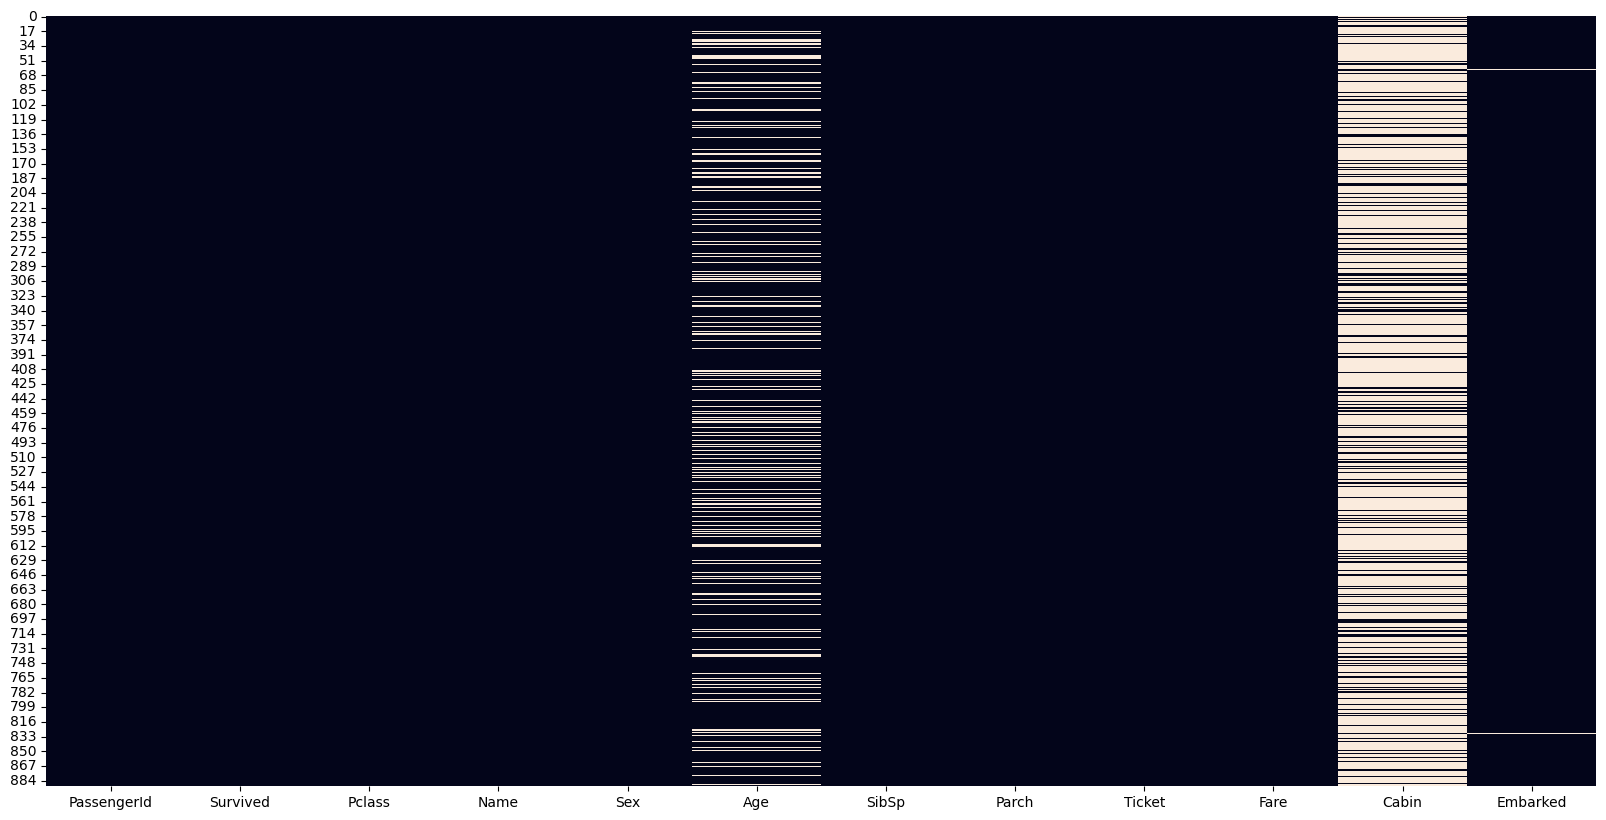

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [46]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

## Content Analysis :



**Eleminate useless columns**

In [47]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.77]]

In [48]:
df = df.drop('PassengerId',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
df = df.drop('Embarked', axis=1)


In [49]:
df.head()

,Survived,Pclass,...,Parch,Fare
0,0,3,...,0,7.2500
1,1,1,...,0,71.2833
2,1,3,...,0,7.9250
3,1,1,...,0,53.1000
4,0,3,...,0,8.0500


In [50]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

**histogram of the continuous variables**

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


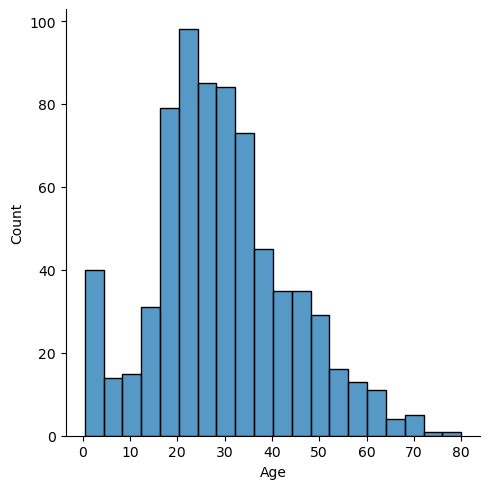

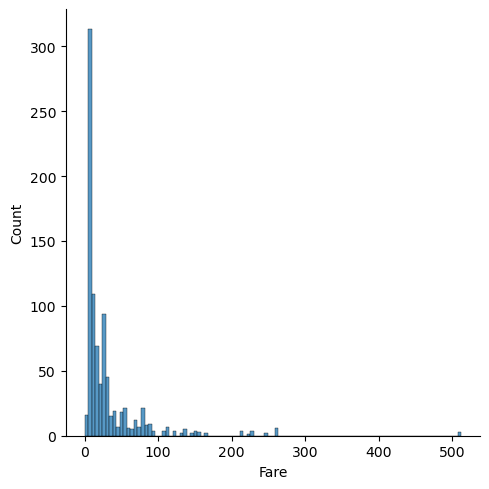

In [51]:
for col in df.select_dtypes('float'):
    sns.displot(df[col])

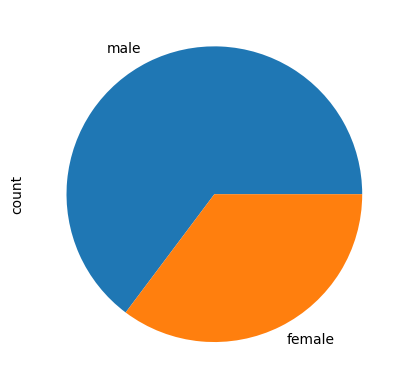

In [52]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

**Relation between Target/Variables**

In [53]:
positive_df = df[df['Survived'] == '1']

In [54]:
negative_df = df[df['Survived'] == '0']

**creation of the sets cabin and age**

In [55]:
missing_rate = df.isna().sum()/df.shape[0]

In [56]:
age_columns = df.columns[(missing_rate < 0.9)& (missing_rate >0.17) ]

AttributeError: 'numpy.int64' object has no attribute 'startswith'

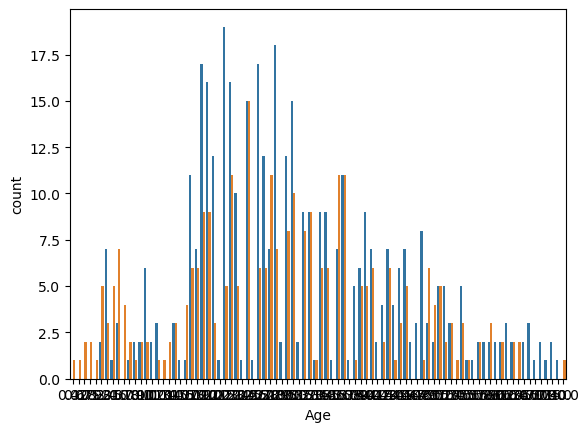

In [57]:
sns.countplot(x='Age',hue='Survived', data=df)

<Figure size 640x480 with 0 Axes>

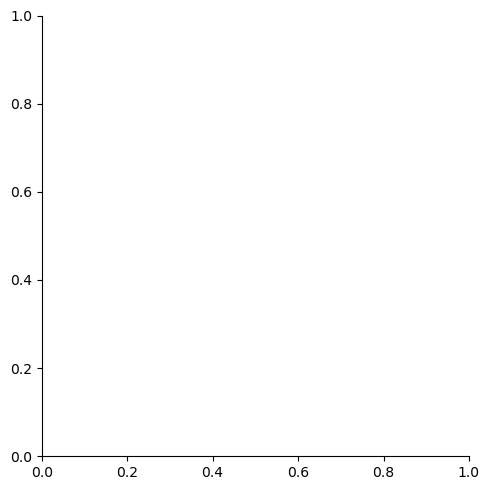

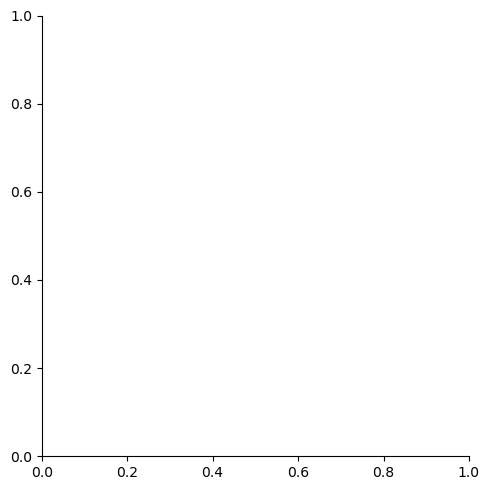

In [58]:
#hadi mabghatch tmchi jcp 3lh
for col in age_columns:
    plt.figure()
    sns.displot(positive_df[col],label="positive")
    sns.displot(negative_df[col],label="negative")
plt.show()
    

## Survived/qualitative variables

In [59]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


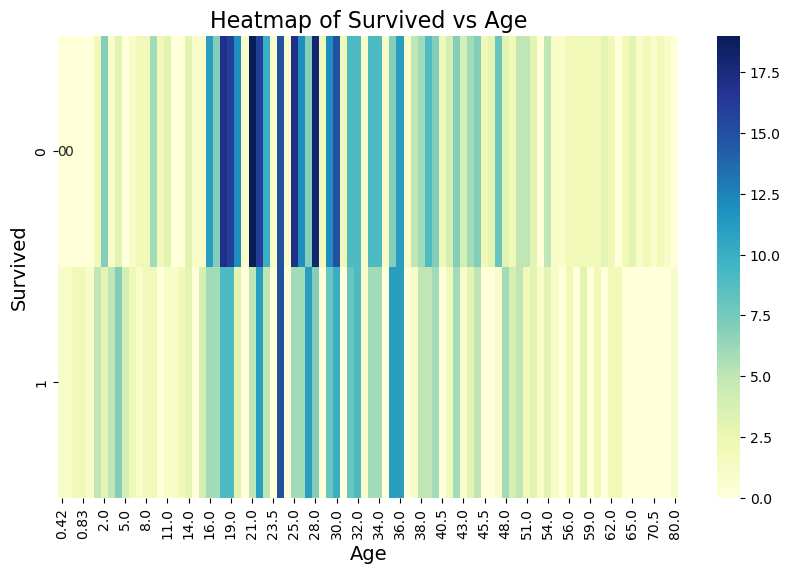

In [62]:
#hadi rahi mkhalta lazem ya tengla3 ya tetsegem
for col in age_columns:
    plt.figure(figsize=(10, 6))  # Create a new figure for each heatmap with a larger size
    heatmap_data = pd.crosstab(df['Survived'], df[col])
    sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
    
    # Add title and labels for clarity
    plt.title(f'Heatmap of Survived vs {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Survived', fontsize=14)
    
    # Show the plot
    plt.show()

In [64]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


          Survived    Pclass  ...     Parch      Fare
Survived  1.000000 -0.338481  ...  0.081629  0.257307
Pclass   -0.338481  1.000000  ...  0.018443 -0.549500
Age      -0.077221 -0.369226  ... -0.189119  0.096067
SibSp    -0.035322  0.083081  ...  0.414838  0.159651
Parch     0.081629  0.018443  ...  1.000000  0.216225
Fare      0.257307 -0.549500  ...  0.216225  1.000000

[6 rows x 6 columns]


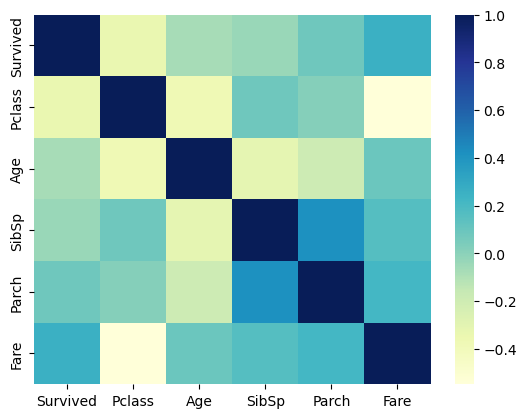

In [66]:
sns.heatmap(numeric_df.corr(),cmap="YlGnBu")
plt.show()

## khosna n3rfo sibsp chafiha w parch chafiha
## rani habes fla video 33:20 

***Basic Checklist :***

**Form Analysis :**

Target variable : survived (0 or 1)

Rows and columns : 891 row 12 column

Types of variables : quantitatives = Age (continuous) Fare (continuous) SibSp (discrete) Parch (discrete)   
                       qualitative = (survived ,pclass ,sex)

Missing values analysis :we will consider cabine because it is significantly missing  other than that we also choose to take age with 19% missing content 

**Content Analysis :**

Visualization of the target : 38% of the people survived 
the rest didnt ...


Meaning of the variables : quantitative variables:- 'fair' is standarized (its centred on 0 )
                                                  - 'Age' is fractional if less than 1.xxIf ,the age is estimated, is it in the form of xx.5
                                                  
                                                  - 'sibsp' is 
                                                  - 'parch' is 

                           qualitative variables:-'survived' is the actual target with binary values  
                                                 - 'sex' is binary (obviously) and its basically telling that men were more than females on this study 
                                                 -'pclass' has 3 values (1,2,3)
    

Relationship between variables and target : survival/age    we see that the younger ppl had more chances to not survive